In [ ]:
"""
Name: Roshan Peri 
Filename: Final_Project_Code.ipynb
Description: Final project code for the 
final project 
"""
import pandas as pd 
import os 
import sys 
import seaborn as sns
import math 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
#sys.path.append('/Users/nsd1nsd2/Library/CloudStorage/OneDrive-NortheasternUniversity/Year_2/Semester_4/Data_Science_Intermediate')
#os.chdir('/Users/nsd1nsd2/Library/CloudStorage/OneDrive-NortheasternUniversity/Year_2/Semester_4/Data_Science_Intermediate/Final_Project')
sys.path.append(r'C:\Users\nsd1n\OneDrive - Northeastern University\Year_2\Semester_4\Data_Science_Intermediate')
os.chdir(r'C:\Users\nsd1n\OneDrive - Northeastern University\Year_2\Semester_4\Data_Science_Intermediate\Final_Project')
import utility_functions as ut
INDEPENDENT = ['offense_total', 'total_plays','takeaways','turnovers','defensive_total', 'points_scored']

Part 1: Analysis of Offensive and Defensive Stats Through Each Decade 

In [152]:
#reading the data set and setting it up for analysis
df = pd.read_csv('nfl-team-statistics.csv')
df = df.set_index('season', drop=False)
df.index.name = None
df['offense_total'] = df['offense_total_yards_gained_pass'] + df['offense_total_yards_gained_run']
df['defensive_total'] = df['defense_total_yards_gained_pass'] + df['defense_total_yards_gained_run']
df['total_plays'] = df['offense_n_plays_run'] + df['offense_n_plays_pass']
df['turnovers'] = df['offense_n_interceptions'] + df['offense_n_fumbles_lost_pass'] + df['offense_n_fumbles_lost_run']
df['takeaways'] = df['defense_n_interceptions'] + df['defense_n_fumbles_lost_run'] + df['defense_n_fumbles_lost_pass']
random_teams_list = ['NE','DAL','BAL','MIA','DET','PHI']
team_names = df['team'].unique().tolist()

In [222]:
def offensive_stats(symbol):
    """
    Purpose: Takes the data 
    and seperates the offensive
    data into two halves based on 
    the symbol inputted. If "<" 
    presented, then it creates a 
    new dataset with only data less 
    than 2010 and vice versa.
    """
    stats = pd.DataFrame()
    for team in team_df:
        if symbol == "<":
            stats = pd.concat([stats, team.loc[team['season'] < 2010]])
        elif symbol == '>': 
            stats = pd.concat([stats, team.loc[team['season'] > 2010]])
    return stats
def genearl_plot(x1,y1,label,color):
    """
    Plots any statistical category
    in the data set based on the 
    x and y given
    """
    sns.barplot(x=x1,y=y1,label=label, color=color)
def defensive_stats(symbol):
    """
    Purpose: Same idea as 
    the offenseive_stats but
    does this for all of the 
    defensive statistics.
    """
    dstats = pd.DataFrame()
    for team in team_df:
        if symbol == "<":
            dstats = pd.concat([dstats, team.loc[team['season'] < 2010]])
        elif symbol == '>': 
            dstats = pd.concat([dstats, team.loc[team['season'] > 2010]])
    return dstats
def average(dataframe, category):
    """
    Purpose: Takes any dataframe 
    and returns the average of the 
    value of the specified column
    """
    avg_teams = [dataframe.loc[dataframe['team'] == team, category].mean() for team in random_teams_list]
    return avg_teams
def team_stats(team):
    """
    Purpose: Returns the 
    all the statistics referring 
    to the particular team referred
    """
    return df.loc[df['team'].isin([team])]
def lin_regress_predict(team, independent, dependent, season=None, rmse = False):
    """
    Purpose: Performs a linear 
    regression on the specified 
    independent and dependent 
    variable and returns the 
    predicted number of wins for 
    specified year. Returns the 
    RMSE if true. 
    """
    df_team = team_stats(team)
    lin_independent = df_team[independent]
    X_train, X_test, y_train, y_test = train_test_split(lin_independent, df_team[dependent], random_state=0, test_size=0.6)
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    
    if season != None:
        year_data = team[team['season'] == season][independent] #code from ChatGPT 
        if year_data.empty:
            return KeyError
        predicted_wins = linear_regression_model.predict(year_data)
        return predicted_wins
    else:
        predictions = linear_regression_model.predict(X_test)
        results = pd.DataFrame()
        results['Actual'] = y_test
        results['Predicted'] = predictions
        predictions_mse = list(predictions)
        y_test_mse = list(y_test)
        final_regressions = math.sqrt(ut.mse(y_test_mse,predictions_mse))
        if rmse == False:
            return results
        elif rmse == True: 
            return results, final_regressions
def lin_regress_future(team, independent, dependent, future_years):
    """
    Purpose: Tries to predict 
    the number of wins for a 
    specified team in the future. 
    """
    linear_independent = df[independent] 
    X_train, X_test, y_train, y_test = train_test_split(linear_independent, df[dependent], random_state=0)
    linear_future = LinearRegression()
    linear_future.fit(X_train, y_train)

    last_year = team['season'].max()
    future_data = []
    for future_year in range(last_year + 1, last_year+future_years+1):
        future_row = linear_independent.mean().tolist()
        future_data.append(future_row)
    future_data = pd.DataFrame(future_data)
    predicted_wins = linear_future.predict(future_data)
    results = pd.DataFrame({
        "Year": range(last_year+1, last_year+future_years+1),
        "Predicted Wins": predicted_wins
    })

    return results
def plotting_wins(team):
    """
    Purpose: Plots a lineplot 
    of the predicted number of 
    wins vs the actual number 
    of wins for any specified team
    """
    sns.lineplot(team_predictions[team])
    plt.title(f"{team}'s Predicted Wins vs. Actual Wins")
    plt.xlabel("Season")
    plt.ylabel("Wins")
def regplot(dataframe,x,y):
    """
    Purpose: Plots a line of
    best fit for the specified 
    x and y values.
    """
    sns.regplot(x=x, y=y, data=dataframe)
    plt.title(f"Regression Plot between {x} and {y}")
    correlation = pearsonr(dataframe[x],dataframe[y])
    return correlation
def kplot(dataframe,independent):
    """
    Purpose: Plots an elbow graph 
    for any independent variable 
    and dataframe. 
    """
    scaler = StandardScaler() #ChatGPT code 
    data = dataframe[independent]
    scaled_data_linear = scaler.fit_transform(data)
    inertia = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(scaled_data_linear)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1,11), inertia, marker='o')
    plt.title('Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()
    return scaled_data_linear
def kmeanplot(dataframe,k_value,scaled_values):
    """
    Purpose: Plots the kmeans 
    clustering plot based on  
    the optimal k value and the 
    data provided. 
    """
    optimal_k = k_value
    kmeans = KMeans(n_clusters=k_value, random_state=0)
    clusters =kmeans.fit_predict(scaled_values)
    dataframe['Clusters'] = clusters
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(scaled_values)
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dataframe['Clusters'], palette='viridis', s=100)
    plt.title('NFL Team Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

In [ ]:
"""
Defining the variables
that will be used 
throughout the code
"""
eagles = team_stats("PHI")
pats = team_stats("NE")
joker_boys = team_stats("DAL")
ravens = team_stats("BAL")
dolphins = team_stats("MIA")
lions = team_stats("DET")
team_df = [eagles,pats,joker_boys,ravens,lions,dolphins]
random_teams_df = pd.concat(team_df)
stats_2000s = offensive_stats('<')
avg_teams_2000 = average(stats_2000s,'offense_total')
stats_2010s = offensive_stats(">")
avg_teams_2010 = average(stats_2010s, 'offense_total')
dstats_2010s = defensive_stats(">")
dstats_2000s = defensive_stats("<")
avg_teams_2010_d = average(dstats_2010s,'defensive_total')
avg_teams_2000_d = average(dstats_2000s,"defensive_total")
avg_teams_2010_d_turnovers = average(dstats_2010s,'turnovers')
avg_teams_2000_d_turnovers = average(dstats_2000s,"turnovers")

Text(0.5, 0, 'NFL Teams')

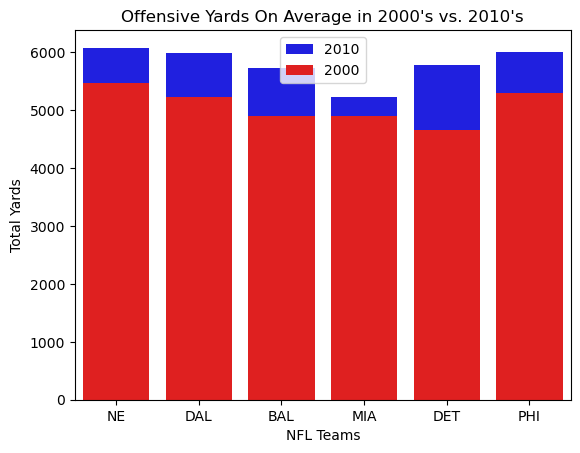

In [ ]:
#Plotting offensive yards 
genearl_plot(random_teams_list,avg_teams_2010,'2010','blue')
genearl_plot(random_teams_list,avg_teams_2000,'2000', 'red')
plt.title("Offensive Yards On Average in 2000's vs. 2010's")
plt.ylabel("Total Yards")
plt.xlabel("NFL Teams")


Text(0.5, 0, 'NFL Teams')

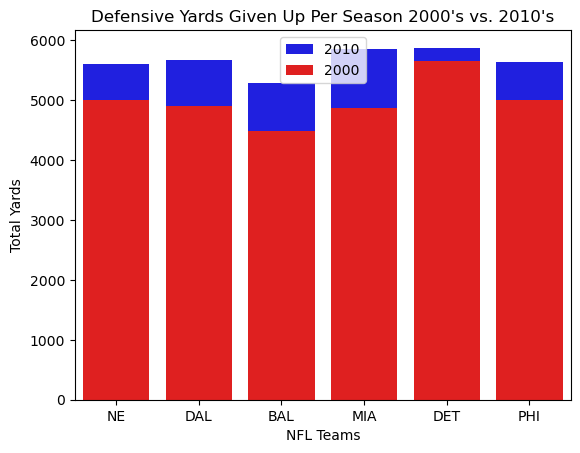

In [ ]:
#Plotting defensive yards 
genearl_plot(random_teams_list,avg_teams_2010_d,'2010','blue')
genearl_plot(random_teams_list,avg_teams_2000_d,'2000','red')
plt.title("Defensive Yards Given Up Per Season 2000's vs. 2010's")
plt.ylabel("Total Yards")
plt.xlabel("NFL Teams")

Text(0.5, 0, 'NFL Teams')

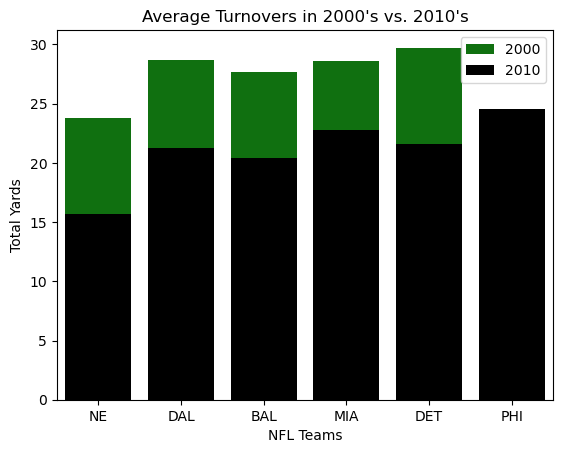

In [211]:
#Plotting turnovers 
genearl_plot(random_teams_list,avg_teams_2000_d_turnovers, '2000', 'green')
genearl_plot(random_teams_list,avg_teams_2010_d_turnovers, '2010', 'black')
plt.title("Average Turnovers in 2000's vs. 2010's")
plt.ylabel("Total Yards")
plt.xlabel("NFL Teams")


Part 2: ML on Predicting Team Wins Based on Offensive Statistics

(      Actual  Predicted
 2010      10  13.222084
 2009      11  12.302211
 2021       9  10.920878
 2013      10  15.516242
 2019       9   9.079954
 2000      11   7.133555
 2012       4   2.273946
 2022      14  14.355844
 2015       7   8.072142
 2007       8   6.971571
 2005       6   4.070836
 2016       7   9.490583
 2003      12   7.964306
 2001      11   7.118626
 2004      13   8.637249,
 2.9071781999734454)

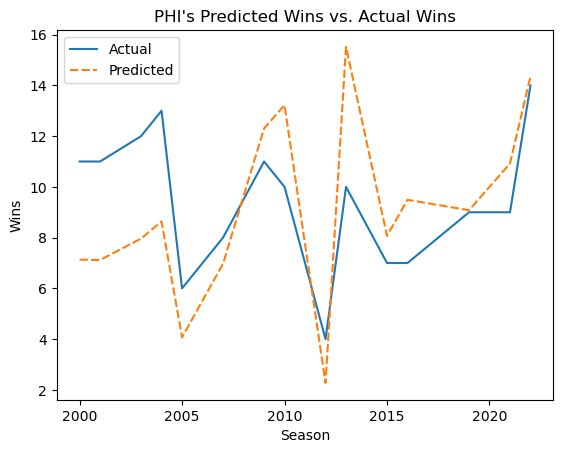

In [ ]:
#Predicting number of wins vs the actual 
predictions = [lin_regress_predict(team,INDEPENDENT,'wins') for team in team_names]
team_predictions = {name:stats for (name,stats) in zip(team_names,predictions)}
random_teams_list = ['NE','DAL','BAL','MIA','DET','PHI']
plotting_wins('PHI')
lin_regress_predict('PHI',INDEPENDENT,'wins',rmse=True)

(      Actual  Predicted
 2010      12   9.051775
 2009       9  12.288345
 2021       8   6.735347
 2013       8   4.159929
 2019      14  14.975053
 2000      12  12.423548
 2012      10   9.484011
 2022      10   9.761098
 2015       5   6.590160
 2007       5   5.375801
 2005       6   5.359916
 2016       8   9.778537
 2003      10   9.573395
 2001      10   7.605102
 2004       9   7.918679,
 1.8372750843202807)

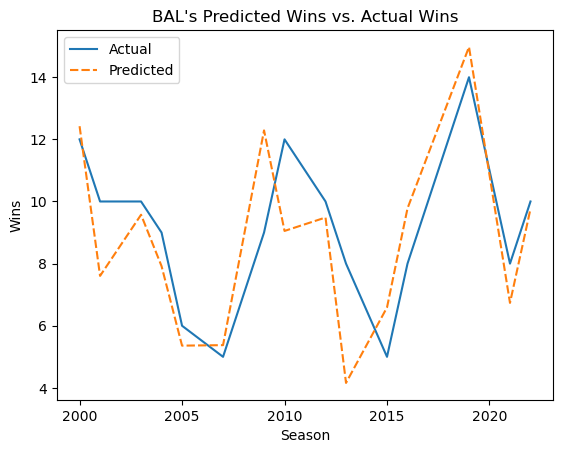

In [212]:
plotting_wins('BAL')
lin_regress_predict('BAL',INDEPENDENT,'wins',rmse=True)

In [215]:
lin_regress_predict('DET',INDEPENDENT,'wins',rmse=True)

(      Actual  Predicted
 2010       6   7.414753
 2009       2  -0.012939
 2021       3   5.125813
 2013       7   6.188524
 2019       3   5.183074
 2000       9   7.199727
 2012       4   6.943711
 2022       9   9.634292
 2015       7   6.663847
 2007       7   4.751263
 2005       5   5.304094
 2016       9   7.778916
 2003       5   4.524794
 2001       2   2.237064
 2004       6   6.766816,
 1.5476635825309808)

In [214]:
lin_regress_predict('MIA',INDEPENDENT,'wins',rmse=True)

(      Actual  Predicted
 2010       7   4.272606
 2009       7   5.527303
 2021       9   6.122003
 2013       8   5.697829
 2019       5   3.581369
 2000      11  14.638085
 2012       7   5.149350
 2022       9   6.308653
 2015       6   5.660982
 2007       1   5.107345
 2005       9   5.910522
 2016      10   7.585688
 2003      10   8.156663
 2001      11   9.370193
 2004       4   4.824807,
 2.4248747281109946)

In [216]:
lin_regress_predict('NE',INDEPENDENT,'wins',rmse=True)

(      Actual  Predicted
 2010      14  16.219100
 2009      10  13.156548
 2021      10  15.017229
 2013      12   8.938715
 2019      12  10.086643
 2000       5   2.686221
 2012      12  11.949336
 2022       8   9.896979
 2015      12  13.978042
 2007      16  24.103182
 2005      10  11.586261
 2016      14  12.226919
 2003      14   7.574229
 2001      11   9.580489
 2004      14  15.269495,
 3.4851998527567933)

In [217]:
lin_regress_predict('DAL',INDEPENDENT,'wins',rmse=True)

(      Actual  Predicted
 2010       6   7.804479
 2009      11   8.401541
 2021      12   8.323314
 2013       8  15.237171
 2019       8   8.705349
 2000       5   8.193719
 2012       8   7.927894
 2022      12   8.256331
 2015       4   7.388144
 2007      13  12.340920
 2005       9   4.061031
 2016      13  12.282500
 2003      10   2.856475
 2001       5   6.418290
 2004       6   4.828477,
 3.5763715563884677)

Part 3: Linear Regression and Correlation

PearsonRResult(statistic=0.7085088540648958, pvalue=2.992042199146486e-23)

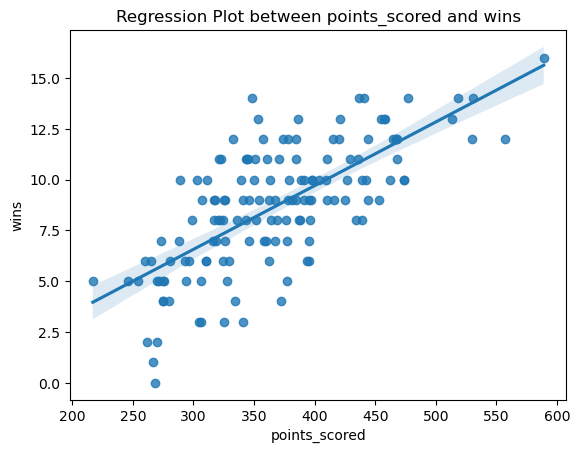

In [187]:
regplot(random_teams_df,'points_scored','wins')

PearsonRResult(statistic=0.7337828987745687, pvalue=3.151239159610762e-130)

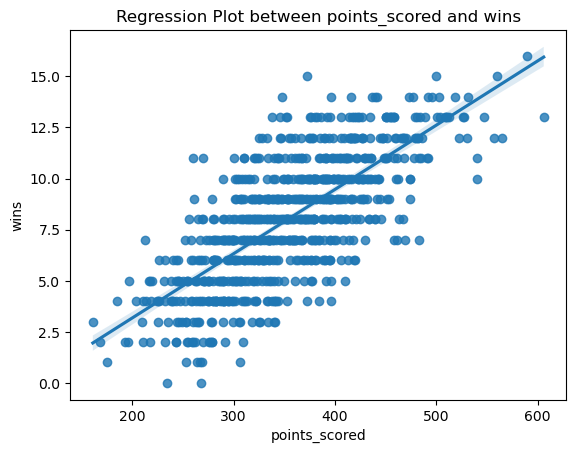

In [189]:
regplot(df,'points_scored','wins')

PearsonRResult(statistic=0.523125263937383, pvalue=5.8253454307344596e-55)

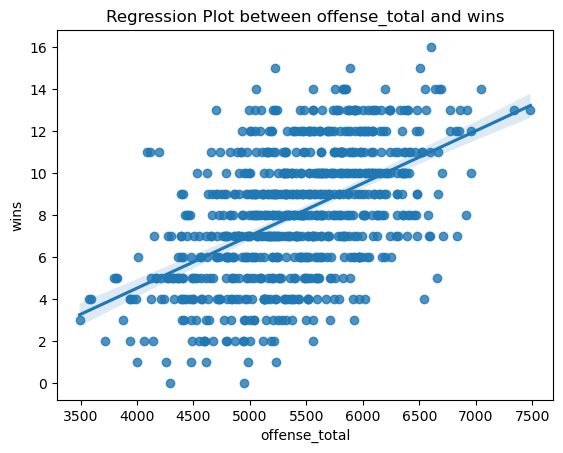

In [218]:
regplot(df,'offense_total','wins')

PearsonRResult(statistic=-0.3646007364100021, pvalue=1.8282952276130469e-25)

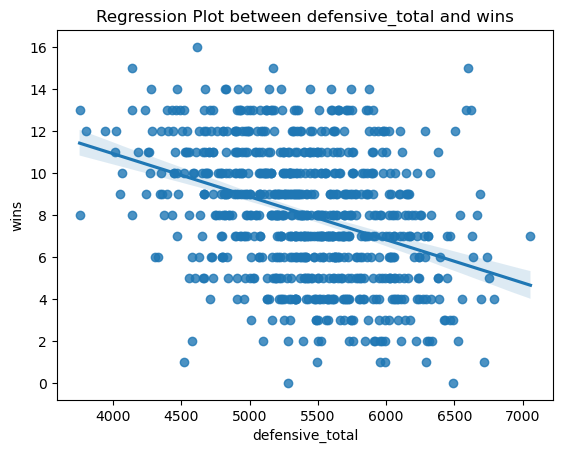

In [219]:
regplot(df,'defensive_total','wins')

Part 4: KMeans Clustering on Teams

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

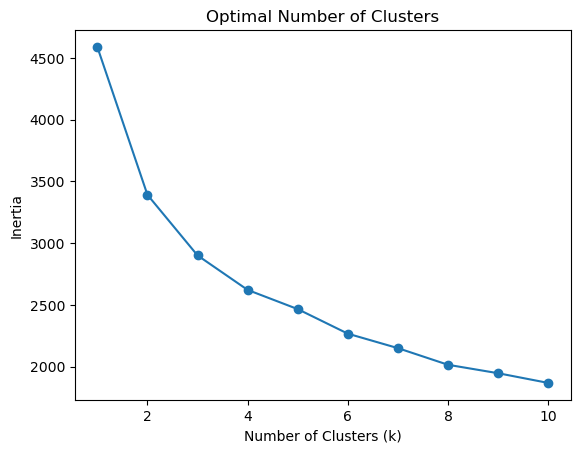

In [224]:
kplots = kplot(df,INDEPENDENT)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


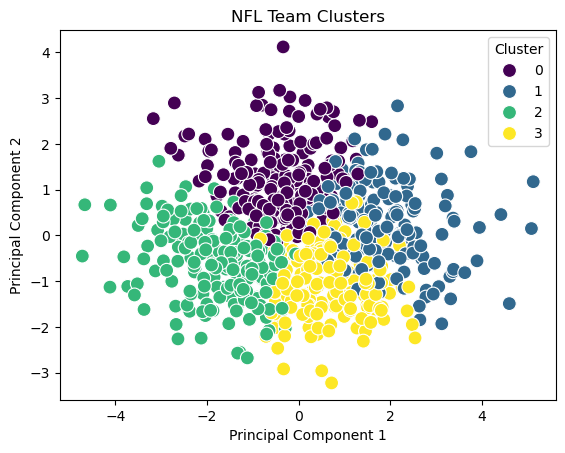

In [223]:
kmeanplot(df,4,kplots)